Class distribution: {0: 95, 1: 118}
Accuracy: 0.4186046511627907
Confusion Matrix:
[[ 0 25]
 [ 0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.42      1.00      0.59        18

    accuracy                           0.42        43
   macro avg       0.21      0.50      0.30        43
weighted avg       0.18      0.42      0.25        43

Next 30 days predicted stock movements (1: Up, 0: Down):
            Predicted_Up
2024-06-25             1
2024-06-26             1
2024-06-27             1
2024-06-28             1
2024-06-29             1
2024-06-30             1
2024-07-01             1
2024-07-02             1
2024-07-03             1
2024-07-04             1
2024-07-05             1
2024-07-06             1
2024-07-07             1
2024-07-08             1
2024-07-09             1
2024-07-10             1
2024-07-11             1
2024-07-12             1
2024-07-13      

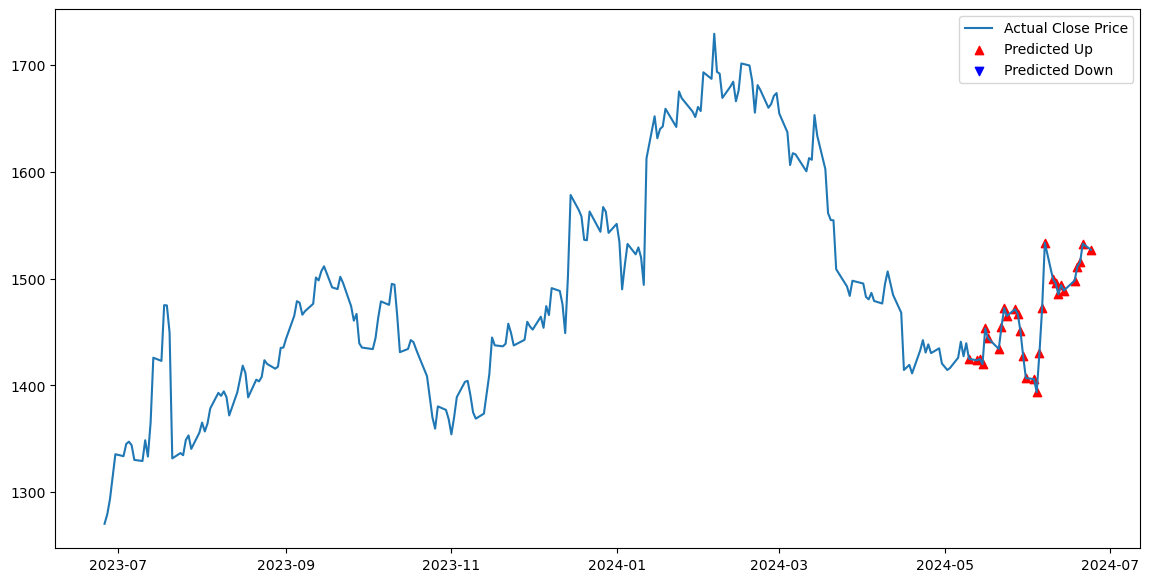

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data):
    stock_data['Target'] = stock_data['Close'].shift(-30) > stock_data['Close']
    stock_data['Target'] = stock_data['Target'].astype(int)
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)[:-30]
    y = np.array(stock_data['Target'])[:-30]
    return X, y

# Print class distribution
def print_class_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    print(f'Class distribution: {dict(zip(unique, counts))}')

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=0)
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Classification Report:\n{report}')
    return model

# Make future predictions
def make_predictions(stock_data, model, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_predictions = model.predict(future_dates_ordinals)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Up'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    # Ensure future_data has a date index
    future_data.index = stock_data.index[-len(future_data):]

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')

    # Get the subset of the stock data that corresponds to future_data
    relevant_stock_data = stock_data['Close'].iloc[-len(future_data):]

    # Ensure that the indices match up correctly
    predicted_up = future_data['Predicted_Up'] == 1
    predicted_down = future_data['Predicted_Up'] == 0

    plt.scatter(future_data.index[predicted_up], relevant_stock_data[predicted_up], color='red', label='Predicted Up', marker='^')
    plt.scatter(future_data.index[predicted_down], relevant_stock_data[predicted_down], color='blue', label='Predicted Down', marker='v')

    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "INFY.NS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X, y = prepare_data(stock_data)
    
    # Print class distribution
    print_class_distribution(y)
    
    model = train_and_evaluate_model(X, y)
    future_data = make_predictions(stock_data, model, days=30)
    
    # Print future predictions
    print("Next 30 days predicted stock movements (1: Up, 0: Down):")
    print(future_data)
    
    plot_results(stock_data, future_data)